# Lab 2 : Deep Learning : Programmation d'un neurone artificiel

Nous allons développer notre premier programme de neurone artificiel.

Alors, pour développer notre programme de neurone artificiel, nous allons partir d'un Dataset $(X, y)$ de 100 lignes et de deux colonnes. 

Si on veut, on peut imaginer que ce Dataset représente des plantes avec la longueur et la largeur de leurs feuilles. Et notre but, c'est d'entraîner un neurone artificiel pour reconnaître les plantes toxiques des plantes non toxique grâce à ces données de référence. 

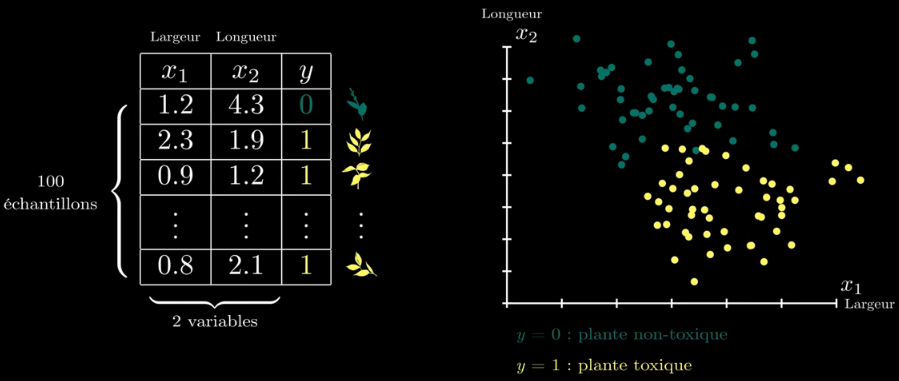

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Pour commencer, nous allons générer un Dataset $(X,y)$ comprenant 100 lignes et deux variables grâce à la fonction $\text{make_blobs}$ que l'on trouve dans sklearn

dimensions de X : (2, 100)
dimensions de y:  (1, 100)


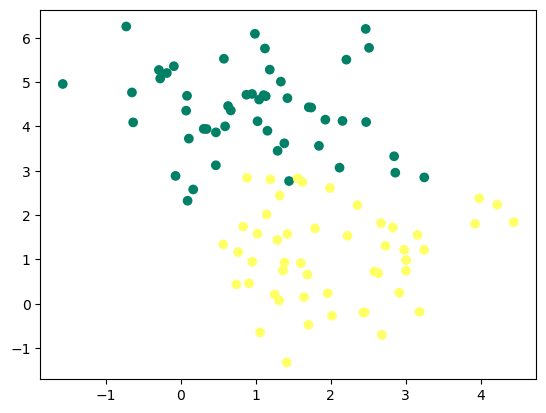

In [28]:
X, y = make_blobs(n_samples=100, n_features= 2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X :', X.shape)
print('dimensions de y: ', y.shape)

plt.scatter (X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

### 1. La première chose qu'on va vouloir faire c'est de créer la fonction d'initialisation.
Donc on va écrire $\mathrm {def\ initialisation}$, dans laquelle nous faisons passer la matrice $X$. Puisque cette matrice, on va s'en servir pour donner aux vecteurs $W$ une dimension de telle sorte à ce que on trouve autant de paramètres dans $W$ que l'on a deux variables dans $X$. 
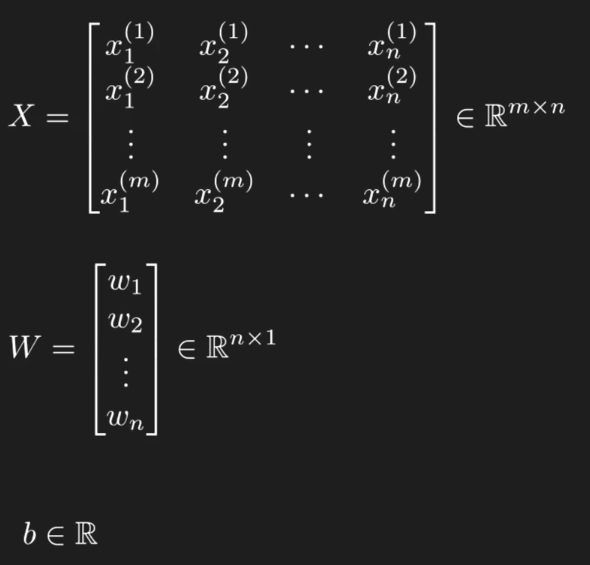

Donc, nous avons une matrice $X$ à deux variables. On désire donc avoir un vecteur $W$ qui contiennent deux paramètres. Et si à l'avenir, dans cette matrice $X$, nous avons quatre, cinq, ou six variables et bien on voudra avoir un vecteur $W$ qui comprennent quatre, cinq ou six paramètres. C'est pourquoi à l'intérieur de la fonction $\mathrm {randn()}$, en termes de dimensions, nous allons passer la dimension de $X$ donc la dimension sur laquelle on retrouve les variables.

Ca nous donnera un vecteur $W$ de dimension (2,1).

Pour le paramètre $b$, nous allons faire sensiblement la même chose ,sauf que nous pouvons tout simplement passer un nombre réel pour le paramètre $b$ et donc cette fonction nous retourne un $tupple$ comprenant $W$ et $b$

In [29]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W, b)

### 2. La fonction modèle

On va pouvoir passer à la deuxième fonction à implémenter. C'est la fonction de notre modèle $\mathrm {def\ model}$ dans laquelle on va faire passer les données $X$ ainsi que les paramètres $W$ et $b$ qui ont été initialisé. 

Alors la première chose qu'on veut faire dans cette fonction modèle, c'est de calculer le vecteur $Z$ d'après les formules qu'on a développé dans les dernières leçons. On sait que $Z$ est le produit matricielle entre $X$ et $W$ plus le paramètre $b$. 

Donc maintenant que nous avons ce vecteur $Z$, nous allons le passé dans notre fonction d'activation pour obtenir le vecteur $A$.
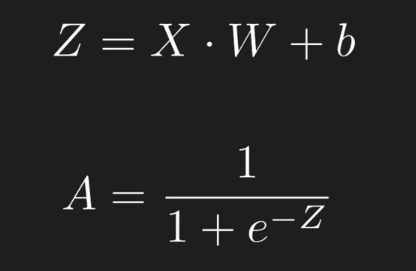

Et donc, notre modèle nous retourne nos activation. 

Alors, la dimensionnalité de $A$ est de (100,1). C'est parce que nous avons 100 valeurs dans notre Dataset échantillons et  donc il est naturel qu'on obtienne 100 activations de la part de notre neurone, une part échantillon.

In [4]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z)) 
    return A

### 3. La fonction de coût

Maintenant nous allons passer à la fonction coût $\mathrm{def\ log\_loss}$. Donc cette fonction, on la connaît grâce à ce qu'on a vu dans les dernières leçons et c'est $\mathcal{L}=-\frac{1}{m} \sum y \times \log (A)+(1-y) \times \log (1-A)$ 

Alors qu'est ce que ça représente $m$, et bien c'est le nombre d'échantillons c'est à dire le nombre de points que l'on a dans $y$ à savoir 100. C'est la longueur de $y$ 

Note: dans le code, j'ai placé le signe "négatif" à l'intérieur de la somme, mais cela ne change rien à notre fonction!

In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))    

Alors on va pouvoir s'en servir et puis vérifier si tout va bien donc $\mathrm {log\_loss (A, y)}$.

En principe c'est censé nous donner un nombre réel et non pas un vecteur et c'est ce qu'on obtient très bien.

### 4. La fonction gradient

Maintenant nous allons créer la fonction des gradients dans laquelle nous nous avons besoin de $A$, $X$ et $y$. 

Alors on va dénoter le Jacobien : $\frac{\partial \mathcal{L}}{\partial W}=\frac{1}{m} X^T \cdot(A-y)$. Donc ça c'est pour $W$ et pour d rond $L$ sur d rond $b$, nous avons $\frac{\partial \mathcal{L}}{\partial b}=\frac{1}{m} \sum(A-y)$

In [6]:
def gradients (A, X, y):
    dw = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dw, db)

Voilà ça c'est la formule de nos gradient donc on va retourner $dW$ et $db$. 

Alors, ici, la dimension $dW$,nous donne un vecteur de dimension (2,1). C'est logique, vu que si on veut ensuite soustraire dans la formule de la descente de gradient le vecteur $W$ au vecteur $dW$,

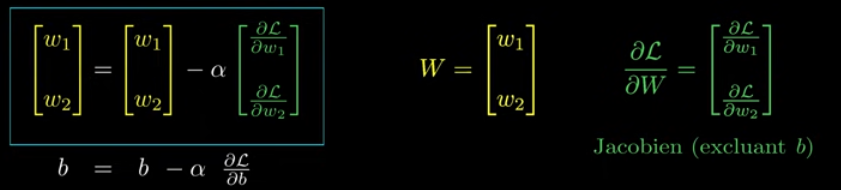

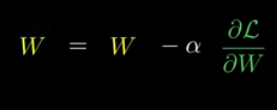

Quand à $db$, en principe ça doit nous donner un nombre réel et c'est bien le cas là on a simplement quelque chose de dimension vide. Ca nous indique que $db$ c'est bien un nombre.

### 5. L'update : descente de gradient

A ce stade, il ne nous reste qu'une dernière chose à implémenter, c'est la fonction de mise à jour $\mathrm {def\ update(dW, db, W, b, learning\_rate)}$

$learning\_rate$ est un pas de mises à jour ou pas d'apprentissage, qui représente le $\alpha$ dans nos formules.

Maintenant, on va implémenter les formules de la descente de gradient.  Cette fonction, nous retourne un tuple comprenant $W$ et $b$.
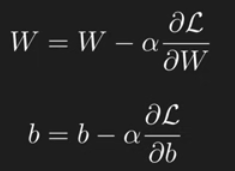


In [7]:
def update (dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 6. Assemblage final

Nous allons rassembler toutes ces formules: l'initialisation, le modèle, le LogLoss,  le gradient et la formule pour mettre à jour nos paramètres. 

On va rassembler tout ça dans notre algorithme
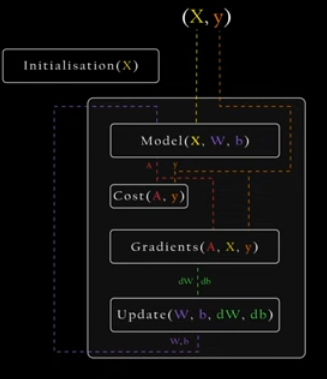





On va créer une fonction $\mathrm{def\ artifical\_neurone(X, y, learning\_rate, nbr\_iter)}$ dans laquelle nous allons faire passer nos données $X$ et $y$ ainsi qu' un learning rate qui nous servira dans la fonction de descente de gradient et il nous faut une dernière chose, c'est un nombre d'itérations, un nombre de cycles.

Alors on va déjà fixer des valeurs par défaut pour ces deux arguments, donc un learning rate égal à 0,1 et un nombre d'itérations égal à 100. 

Donc la première chose à faire, c'est d'initialiser les paramètres $W$ et $b$. Ensuite, on va créer notre boucle d'apprentissage avec une boucle for. Et on va répéter en boucle la fonction de notre modèle, celle de notre coût, celle de nos gradients, et celle de notre descente de gradient. 

In [8]:
def artificial_neurone(X, y, learning_rate=0.1, nbr_iter=100):
    #initialisation W, b
    W, b = initialisation (X)
    
    for i in range(n_iter):
        A = model(X, W, b)
        loss = log_loss(X, W, b)
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    

Donc en effectuant cet algorithme en boucle, les paramètres $W$ et $b$ seront mises à jour. Puis ils seront réutilisées tout en haut dans la fonction modèle pour refaire des prédictions qui seront à nouveau comparé pour calculer des gradients, pour remettre à jour les paramètres $W$ et $b$ etc...

Voilà ça conclut notre implémentation d'un neurone artificiel. 

### 7. Visualiser l'évolution du coût
Alors je vous rassure la leçon n'est pas finie, la première chose qu'on pourrait faire serait de visualiser l'évolution du coût. Pour s'assurer que notre modèle est bien appris.

On va créer une liste Loss et on va à chaque fois rajouter à la fin de la liste, la valeur du coût qui est calculé pour l'itération en cours. Et donc ce qu'on peut faire à la fin de notre algorithme, c'est afficher une courbe.

In [9]:
def artificial_neurone(X, y, learning_rate=0.1, nbr_iter=100):
    #initialisation W, b
    W, b = initialisation (X)
    
    loss=[]
    
    for i in range(nbr_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    plt.plot(loss)
    plt.show()

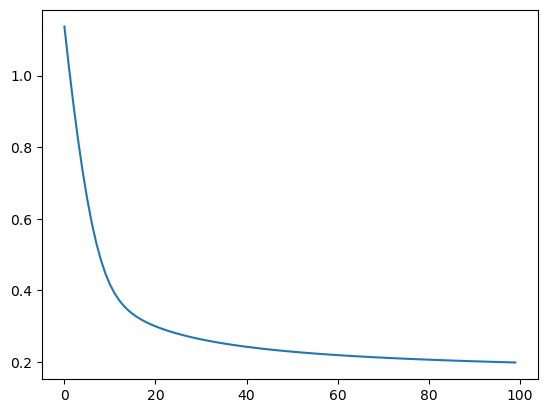

In [10]:
artificial_neurone(X, y)

### 8. Effectuer des predictions

Alors maintenant que nous avons un modèle, nous pouvons nous en servir pour effectuer des prédictions. Par exemple, si je prends une nouvelle plante et que je mesure la longueur et la largeur de ses feuilles et que j'entre ces informations dans mon modèle, celui ci va me retourner la probabilité que la plante soit toxique car, rappelez vous, la sortie de notre modèle c'est une fonction sigmoïde que l'on peut voir comme une probabilité toujours comprise entre 0 et 1. 

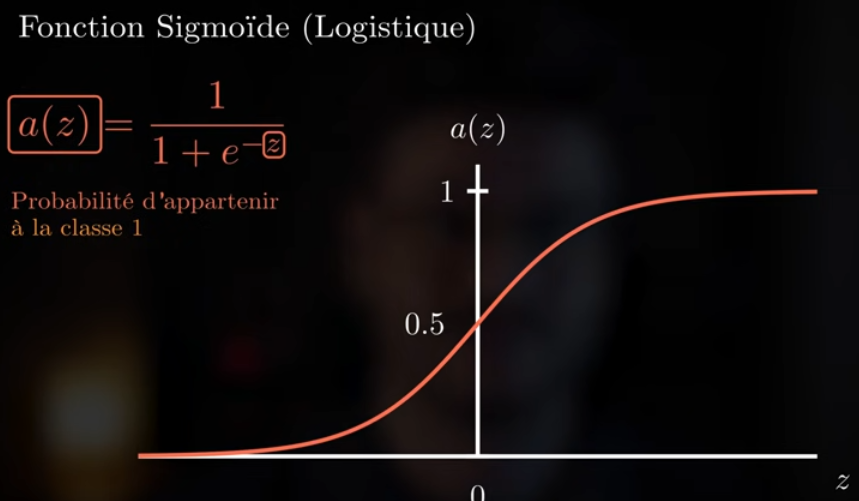

Donc ce qu'on fait en général, c'est qu'à partir du moment où cette probabilité est supérieur à 0,5, on dit que la plante est toxique et qu'elle appartient à la classe $y$ =  1. 

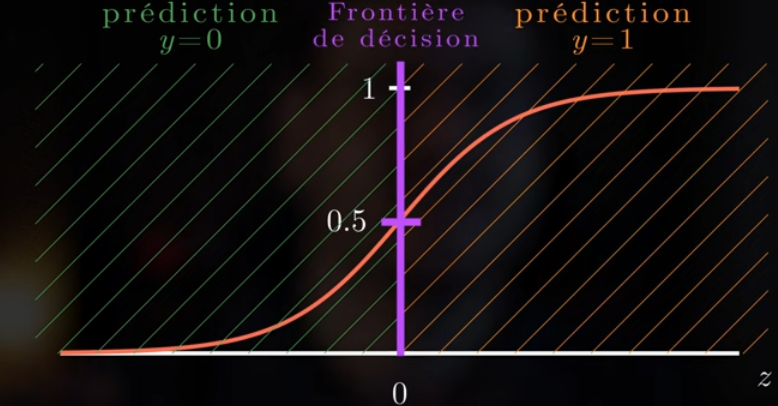

Alors pour l' implémenter, il va donc falloir créer une nouvelle fonction predict, dans laquelle nous ferons passer des données $X$, alors ça peut être les données dont on dispose à l'heure actuelle ou bien n'importe quelle donnée futur, ainsi que les paramètres de notre modèle. 

La première chose à faire dans cette fonction c'est de calculer les activations, les sorties du modèle, grâce à $(X,W,b)$. Ensuite ces activations lorsqu'elles seront supérieures au seuil de 0,5, alors on dit généralement supérieures ou égale, on retournera la valeur de la classe. Ici, on peut simplement écrire ça sous forme booléenne.

In [11]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

Alors on peut s'en servir dans notre fonction artificial neurone. Une chose qu'on peut faire, c'est après avoir fini notre apprentissage et bien on peut calculer les prédictions pour toutes les données $X$ de notre Dataset. donc les 100 données que nous avons. Donc on va calculer ce que la machine prédit pour ses 100 valeurs. 

Ensuite une chose qui serait très cool à faire ça serait d'imprimer la performance de notre modèle. Alors pas la fonction coût, pas le Loss mais bien la performance, ici, en l'occurrence on pourrait choisir une accuracy c'est à dire une exactitude. 

In [12]:
from sklearn.metrics import accuracy_score

Cette fonction,  on va s'en servir pour comparer les données de référence $y$ avec nos prédictions.

In [13]:
def artificial_neurone(X, y, learning_rate=0.1, nbr_iter=100):
    #initialisation W, b
    W, b = initialisation (X)
    
    loss=[]
    for i in range(nbr_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    plt.plot(loss)
    plt.show()

Si maintenant on reexécute notre code,  nous voyons que notre modèle à une performance égale à 89 % c'est-à-dire que sur ces données d'entraînement elle arrive à donner de bonnes réponses 89 % du temps. D'ailleurs comme nous avons exactement 100 points dans notre Dataset ça veut dire qu'elle fait 89 bonnes réponses.

[[0.97505856]
 [0.65431985]
 [0.00590418]
 [0.1032511 ]
 [0.96145539]
 [0.33767134]
 [0.07873873]
 [0.96095725]
 [0.04927127]
 [0.79268069]
 [0.03511098]
 [0.82413749]
 [0.03661844]
 [0.01800181]
 [0.68083499]
 [0.98689034]
 [0.98757111]
 [0.03537368]
 [0.60463133]
 [0.57283308]
 [0.056726  ]
 [0.04016875]
 [0.36394573]
 [0.00597592]
 [0.93856771]
 [0.03919026]
 [0.82414882]
 [0.01384523]
 [0.08553866]
 [0.74633207]
 [0.96605112]
 [0.05381943]
 [0.56504791]
 [0.96675272]
 [0.39955472]
 [0.29130738]
 [0.70648304]
 [0.5558725 ]
 [0.49890848]
 [0.34940182]
 [0.05290977]
 [0.13410297]
 [0.00111001]
 [0.1794461 ]
 [0.1796794 ]
 [0.81931859]
 [0.94432408]
 [0.92937364]
 [0.00462706]
 [0.0128703 ]
 [0.90880725]
 [0.45213851]
 [0.09054493]
 [0.05608048]
 [0.85376895]
 [0.05358733]
 [0.75610141]
 [0.76775696]
 [0.94496465]
 [0.98436265]
 [0.58852079]
 [0.22569246]
 [0.00594376]
 [0.91820272]
 [0.02221161]
 [0.36208475]
 [0.0327191 ]
 [0.68563093]
 [0.94225965]
 [0.3045245 ]
 [0.18338218]
 [0.87

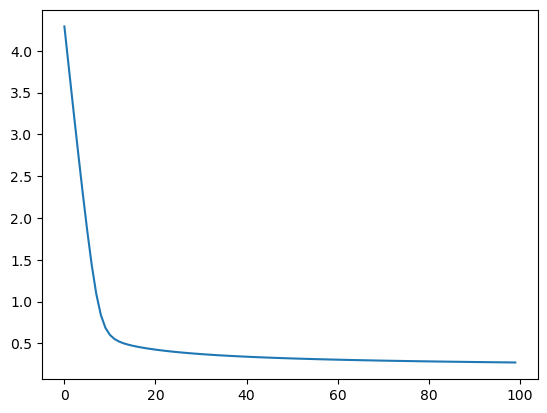

In [14]:
artificial_neurone(X, y)

Donc, maintenant vous pourriez vous dire c'est chouette tout ça, mais ce que j'aimerais ça serait me servir de ce modèle pour faire de futurs prédictions. Alors pour ça il va déjà falloir retourner les paramètres $W$ et $b$ que le modèle a appris.

In [15]:
def artificial_neurone(X, y, learning_rate=0.1, nbr_iter=100):
    #initialisation W, b
    W, b = initialisation (X)
    
    loss=[]
    for i in range(nbr_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    plt.plot(loss)
    plt.show()
    
    return(W, b)

Ces paramètres d'ailleurs on peut ensuite les sauvegarder sur notre disque dur et à l'avenir à chaque fois qu'on a besoin de faire des prédictions, nous n'avons pas besoin de ré entraîner un modèle tout ce qu'on fait c'est qu'on charge ces paramètres dans un programme on les fait passer dans notre fonction predict et voilà, on a notre réponse. 



[[0.933336  ]
 [0.83047362]
 [0.00923912]
 [0.22269141]
 [0.94717392]
 [0.37609409]
 [0.08296081]
 [0.90527864]
 [0.06469358]
 [0.89904883]
 [0.04113611]
 [0.88902577]
 [0.02772072]
 [0.02805343]
 [0.7323393 ]
 [0.96373942]
 [0.98781187]
 [0.05372208]
 [0.81169361]
 [0.69864169]
 [0.05040545]
 [0.04727854]
 [0.43639496]
 [0.00872521]
 [0.94394577]
 [0.0388223 ]
 [0.91635905]
 [0.00951332]
 [0.06779969]
 [0.71892911]
 [0.97653393]
 [0.05058052]
 [0.74641886]
 [0.97678164]
 [0.4207814 ]
 [0.2024158 ]
 [0.81712575]
 [0.54224357]
 [0.44383421]
 [0.57219423]
 [0.11652094]
 [0.05244641]
 [0.00164966]
 [0.17974077]
 [0.24928524]
 [0.83102963]
 [0.96844497]
 [0.96665457]
 [0.00929658]
 [0.01220178]
 [0.94291075]
 [0.66059112]
 [0.03189839]
 [0.04232921]
 [0.74221891]
 [0.0479548 ]
 [0.64184017]
 [0.84733381]
 [0.93334994]
 [0.9892269 ]
 [0.69214685]
 [0.16615698]
 [0.00801606]
 [0.90985264]
 [0.0154971 ]
 [0.38528239]
 [0.0570529 ]
 [0.53842671]
 [0.91881665]
 [0.26311566]
 [0.19617494]
 [0.93

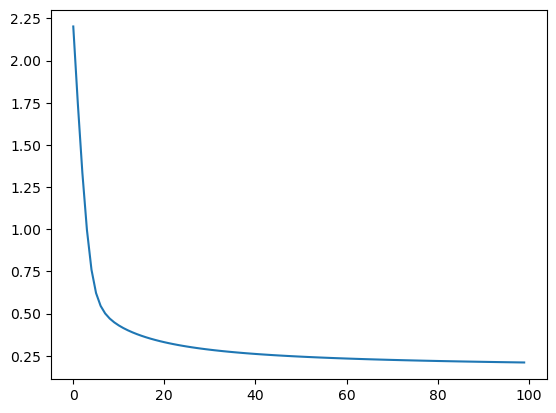

(array([[ 0.91759159],
        [-1.1202775 ]]),
 array([1.27115149]))

In [16]:
W, b = artificial_neurone(X, y)
W, b

Et nous allons utiliser ces paramètres sur une nouvelle plante. Donc par exemple disons qu'on récolte une plante et qu'on mesure sa variable $x_1 = 2\ et\ x_2 = 1$. 

Donc nous allons écrire new_plant égal un tableau matricielle [2,1]. 

In [17]:
new_plant = np.array([2,1])

On va la visualiser dans notre graphique et on va dire que la couleur est rouge pour cette plante.

<function matplotlib.pyplot.show(close=None, block=None)>

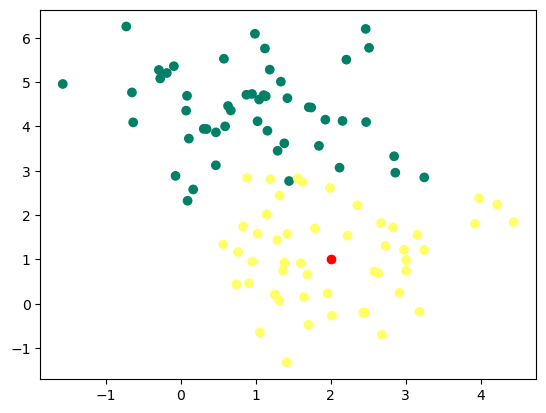

In [18]:
plt.scatter (X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show

In [19]:
print(predict (new_plant, W, b))

[0.87932538]
[ True]


Et voilà selon la machine cette plante est dans la classe numéro 1, donc dans la classe des plantes toxiques. Cette plante est dangereuse et il ne faut pas la consommer. 
Et ce qu'on voit c'est que cette plante est toxique à 96%. 

### 9. Tracer la frontière de décision

Pour aller encore plus loin, on pourrait même tracer la frontière de décision qui sépare nos deux classes. 

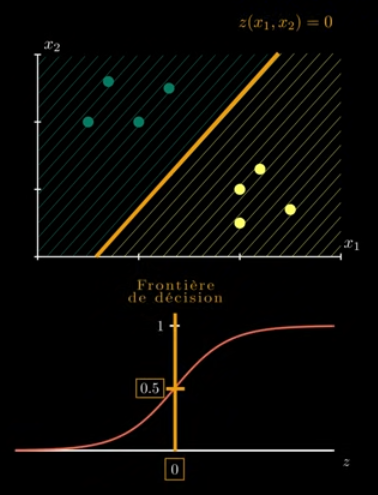

Notre frontière de décision, c'est l'ensemble des points pour lesquels $Z$ est égal à zéro et ça c'est parfaitement logique d'un point de vue mathématique vu qu'on a dit que la frontière de décision c'est aussi l'endroit pour lequel les probabilités supérieurs à 50% aura le point $Z$ pour lequel $a$ est égal à 0,5 c'est à dire la fonction sigmoïde est égal à 0,5, c'est lorsque $Z$ est égal à zéro. 

Voilà donc pourquoi ces deux éléments sont liés $Z$ égal 0 et $a$ égal et 0,5, c'est la même chose. 

Donc pour connaître l'équation de la droite que l'on voudrait tracé, il suffit de dire que c'est l'ensemble des points pour lesquels $Z$ est égal à zéro. 

C'est à dire l'ensemble des points $(x_1, x_2)$ pour lesquels $w_1 x_1 + w_2 x_2 + b = 0$. 

Alors en faisant un petit peu de mathématiques on peut isoler les termes $x_1$ et $x_2$, ce qui nous permet de dire par exemple si on veut tracer une droite allant de  $x_1=-1$  et $ x_1=4$  et bien donc on peut dire que $x_2 = (- w_1 x_1 - b) / w_2$.

Donc on va créer $x_0$ pour commencer notre indexing, on va dire que $x_0$ c'est la première variable et $x_1$ c'est la deuxième variable, qui s'étend de -1 à +4 donc avec un linspace de -1 à +4 avec 100 points. Et ensuite on va dire que $x_1 = (- w_0 x_0 - b) / w_1$

<function matplotlib.pyplot.show(close=None, block=None)>

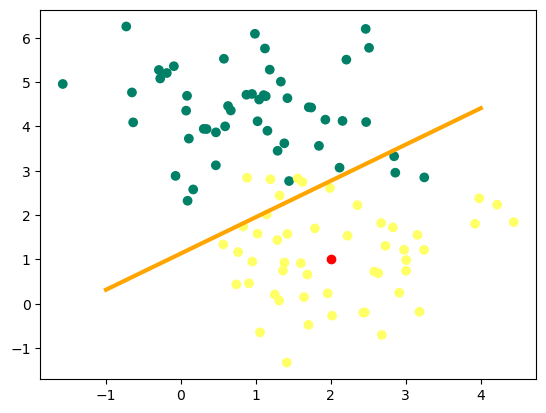

In [20]:
new_plant = np.array([2,1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 - b) / W[1]

plt.scatter (X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')

plt.plot(x0, x1, c='orange', lw=3)

plt.show

Donc, on comprend que tout ce qui est au dessus va être prédits par la machine comme appartenant dans la classe verte. Donc ici c'est la classe zéro, les plantes non toxique. Et tout ce qui est en dessous va être dans la classe jaune, donc la classe des plantes toxiques. 

### 10. Visualisations 3D et Animation

Alors si on veut encore plus s'amuser on peut visualiser tout ça en 3D. 

In [21]:
import plotly.graph_objects as go

In [22]:
fig = go.Figure(data = [go.Scatter3d(
    x = X[:, 0].flatten(),
    y = X[:, 1].flatten(),
    z = y.flatten(),
    mode = 'markers',
    marker = dict(
        size = 5,
        color = y.flatten(),
        colorscale = 'YlGn',
        opacity = 0.8,
        reversescale = True    
    )
)])

fig.update_layout (template = 'plotly_dark', margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [23]:
X0 = np.linspace(X[: ,0].min(), X[: ,0].max(), 100)
X1 = np.linspace(X[: ,1].min(), X[: ,1].max(), 100)
xx0, xx1 = np.meshgrid(x0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z = A, x = xx0, y = xx1, colorscale='YlGn', opacity = 0.7, reversescale = True )]))
fig.add_scatter3d(x = X[:, 0].flatten(), y = X[:, 1].flatten(), z = y.flatten(), mode = 'markers', marker = dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale = True))

fig.update_layout (template = 'plotly_dark', margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

Une chose encore plus amusante c'est de sauvegarder tout l'historique d'apprentissage de la machine, c'est à dire la valeur de $W$ et $b$ pour chaque itération. Pour ensuite générer une animation qui permet de voir quel a été le comportement du modèle lors de son apprentissage. 

### IMPORTANT

Pour que cela fonctionne, il faut installer FFMPEG sur votre machine : https://ffmpeg.org/ avec un tutoriel : https://www.wikihow.com/Install-FFmpeg-on-Windows

In [24]:
def artificial_neurone(X, y, learning_rate=0.1, nbr_iter=100):
    #initialisation W, b
    W, b = initialisation (X)
    
    history=[]
    loss=[]
    
    for i in range(nbr_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate=learning_rate)
        history.append([W, b, loss, i])  
    
    plt.plot(loss)
    plt.show()
    
    return history

In [25]:
def animate(params):
    W = params[0]
    b = params[1]
    loss = params[2]
    i = params[3]
    
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    
    s = 300
    
    # Frontière de décision
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='summer', edgecolor='k', linewidth=3 )
    
    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()
    
    x1 = np.linspace(-3, 6, 100)
    x2 = ( - W[0] * x1 - b) / W[1]
    ax[0].plot(x1, x2, c='orange', lw=4)
    
    ax[0].set_xlim(X[:, 0].min(), X[:, 0].max() )
    ax[0].set_ylim(X[:, 1].min(), X[:, 1].max() )
    ax[0].set_title('Frontière de Décision')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    
    #Sigmoïde
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new)) 
    ax[1].plot(z_new, A, c='orange', lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c='#000064', edgecolor='k',linewidth=3, s=s)
    ax[1].scatter(z[y==1], np.ones(z[y==1].shape), c='#ffff64', edgecolor='k',linewidth=3, s=s)
    
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title('Sigmoïd')
    ax[1].set_xlabel('Z')
    ax[1].set_ylabel('A(Z)')
    
    
    #Fonction coût
    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j], ymin=0, ymax=1 / (1 + np.exp(-z[y==0][j])), color='red', alpha=0.5, zorder=-1)
        
    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j], ymin=1, ymax=1 / (1 + np.exp(-z[y==1][j])), color='red', alpha=0.5, zorder=-1)
    
    ax[2].plot(range(i), loss[:i], color='red', lw=4)
    ax[2].set_xlim(loss[-1] * 0.5, len(loss))
    ax[2].set_ylim(0, loss[0] * 1.1)
    ax[2].set_title('Fonction coût')
    ax[2].set_xlabel('itaration') 
    ax[2].set_ylabel('loss')      

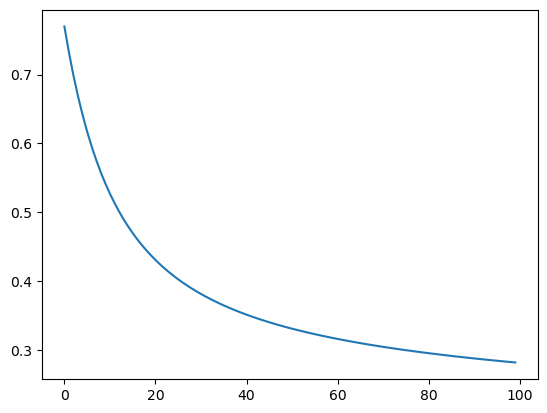

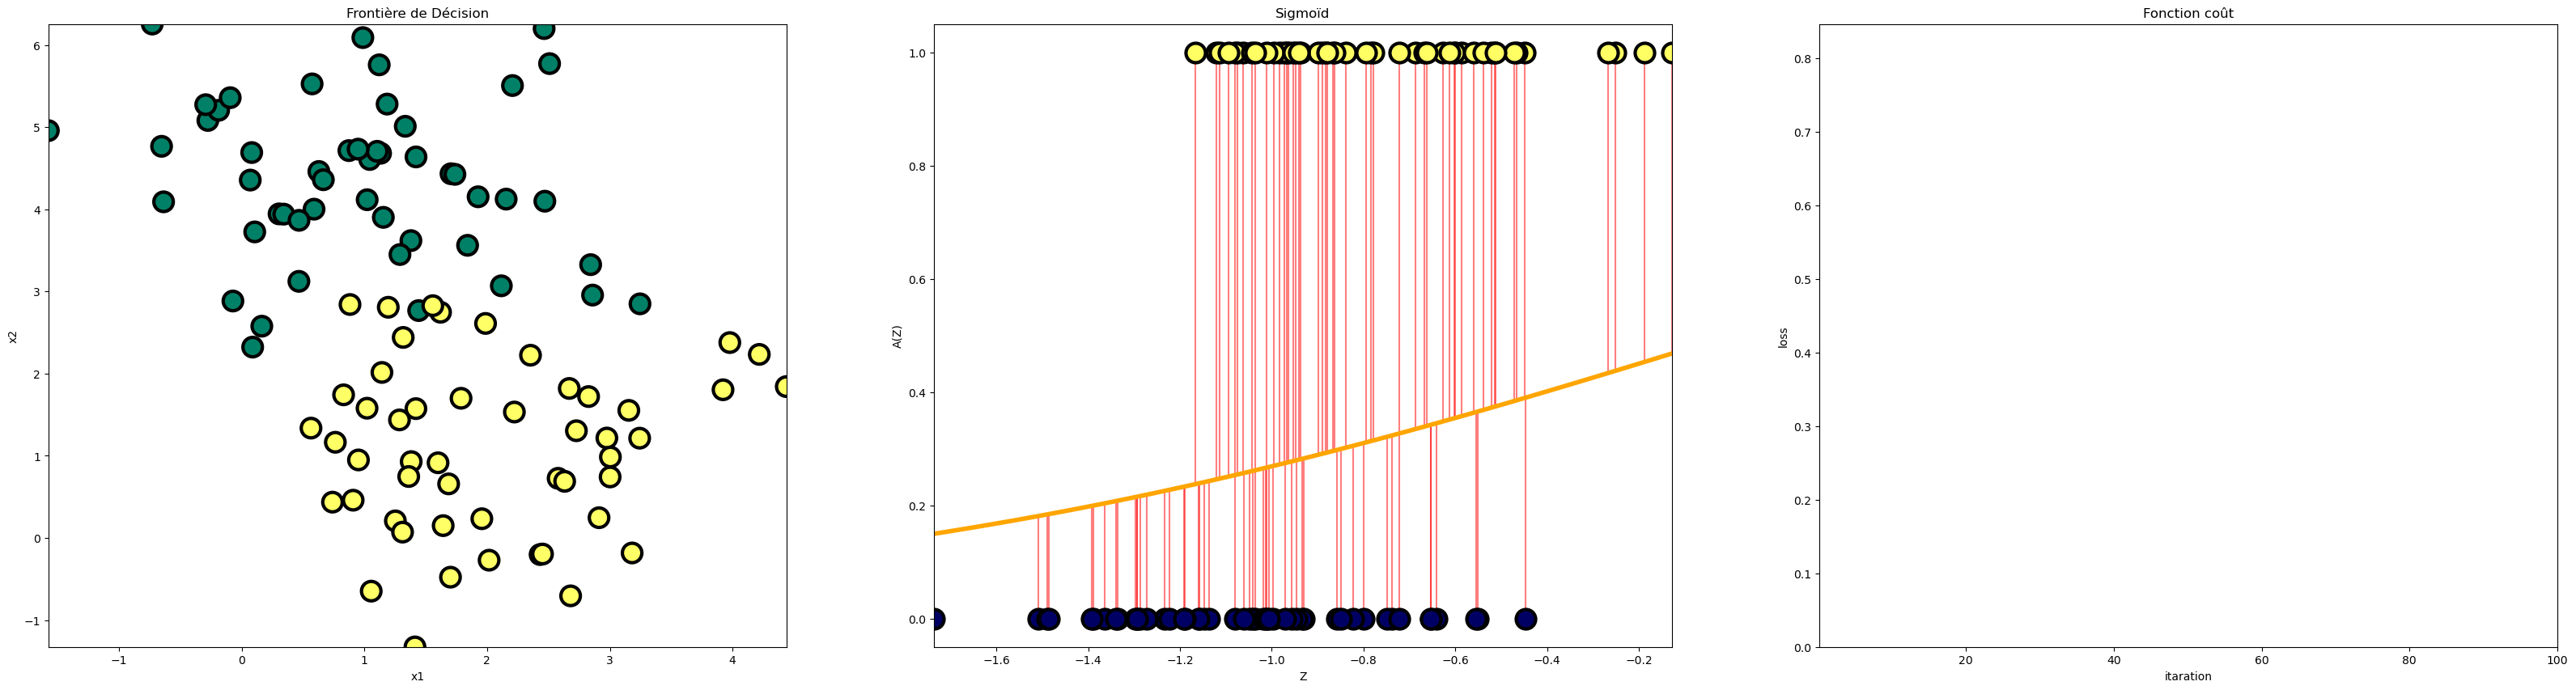

In [26]:
from matplotlib.animation import FuncAnimation

history = artificial_neurone(X, y)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10)) 
ani = FuncAnimation(fig, animate, frames=history, interval=200, repeat=False)

import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=3200)
ani.save('animation.mp4', writer=writer)